In [3]:
!pip install lightkurve

     |████████████████████████████████| 245 kB 5.2 MB/s 
     |████████████████████████████████| 4.4 MB 36.0 MB/s 
     |████████████████████████████████| 98 kB 7.4 MB/s 
     |████████████████████████████████| 41 kB 200 kB/s 
     |████████████████████████████████| 22.3 MB 59.8 MB/s 
     |████████████████████████████████| 802 kB 70.5 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 3.2 MB 37.2 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=6d41bee28a3e18fc00ed2c3b37982ce6e554afd2243307f8afc82755947a8bde
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=81c3b9d36647efe07696536279430271c7640fbc40a5aaac0dc3d066e811f128
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for ok

In [7]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Search Kepler data for Quarters 6, 7, and 8.
search_result = lk.search_lightcurve('WASP-33', mission='TESS')
# Download and stitch the data together
lc = search_result.download()
# Plot the resulting light curve
lc

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1790.6619413258175,1.1595212e+05,3.9857983e+01,5.3082877e-03,405505,840.78865,1441.48421,1.1247804e+05,3.7518604e+01,3.0002026e+03,8.9794817e+00,1.1595212e+05,3.9857983e+01,0,nan,nan,nan,nan,840.78865,3.0317821e-04,1441.48421,2.8647776e-04,-6.8004496e-02,-8.1130780e-02
1790.6633302336775,1.1592225e+05,3.9864037e+01,5.3083072e-03,405506,840.79534,1441.46993,1.1248684e+05,3.7524303e+01,2.9959536e+03,8.9911451e+00,1.1592225e+05,3.9864037e+01,0,nan,nan,nan,nan,840.79534,3.0322428e-04,1441.46993,2.8698691e-04,-6.1256103e-02,-9.8540038e-02
1790.6647191415386,1.1603280e+05,3.9873791e+01,5.3083268e-03,405507,840.79426,1441.47860,1.1259015e+05,3.7533485e+01,3.0067415e+03,8.9643097e+00,1.1603280e+05,3.9873791e+01,0,nan,nan,nan,nan,840.79426,3.0288054e-04,1441.47860,2.8640270e-04,-6.2241338e-02,-8.7850273e-02
1790.666108049866,1.1599455e+05,3.9864208e+01,5.3083468e-03,405508,840.79270,1441.48384,1.1246293e+05,3.7524464e+01,3.0151792e+03,8.9940090e+00,1.1599455e+05,3.9864208e+01,0,nan,nan,nan,nan,840.79270,3.0304067e-04,1441.48384,2.8724479e-04,-6.3250341e-02,-8.2591563e-02
1790.6674969577268,1.1599179e+05,3.9860939e+01,5.3083664e-03,405509,840.79546,1441.46618,1.1250950e+05,3.7521389e+01,3.0058518e+03,8.9709730e+00,1.1599179e+05,3.9860939e+01,0,nan,nan,nan,nan,840.79546,3.0317693e-04,1441.46618,2.8699733e-04,-6.1086483e-02,-1.0403010e-01
1790.6688858655873,1.1591475e+05,3.9861332e+01,5.3083859e-03,405510,840.79087,1441.47988,1.1247745e+05,3.7521759e+01,3.0039724e+03,8.9735718e+00,1.1591475e+05,3.9861332e+01,0,nan,nan,nan,nan,840.79087,3.0331514e-04,1441.47988,2.8635401e-04,-6.5754421e-02,-8.6483635e-02
1790.6702747734473,1.1594251e+05,3.9860107e+01,5.3084055e-03,405511,840.78981,1441.47948,1.1251526e+05,3.7520607e+01,3.0117236e+03,8.9523849e+00,1.1594251e+05,3.9860107e+01,0,nan,nan,nan,nan,840.78981,3.0309777e-04,1441.47948,2.8643344e-04,-6.6925935e-02,-8.6572245e-02
1790.6716636813082,1.1595520e+05,3.9873070e+01,5.3084251e-03,405512,840.79189,1441.47540,1.1252455e+05,3.7532810e+01,2.9988379e+03,8.9970007e+00,1.1595520e+05,3.9873070e+01,0,nan,nan,nan,nan,840.79189,3.0304497e-04,1441.47540,2.8665797e-04,-6.3949764e-02,-9.2469670e-02


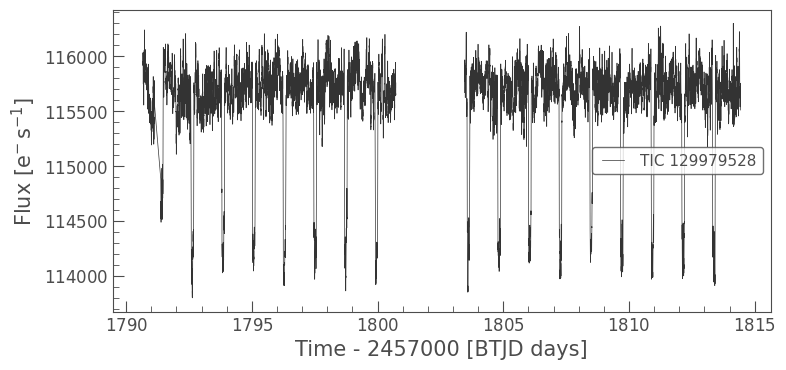

In [31]:
lc.plot();

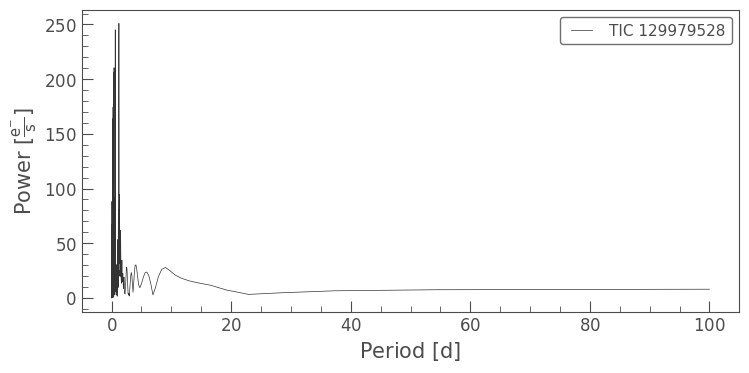

In [32]:
pg = lc.to_periodogram(maximum_period=100)
pg.plot(view='period');

In [33]:
pg.period_at_max_power

<Quantity 1.22319325 d>

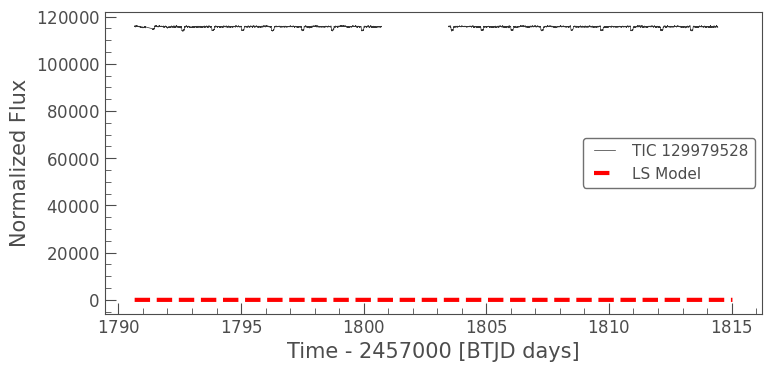

In [34]:
# Create a model light curve for the highest peak in the periodogram
lc_model = pg.model(time=lc.time, frequency=pg.frequency_at_max_power)
# Plot the light curve
ax = lc.plot()
# Plot the model light curve on top
lc_model.plot(ax=ax, lw=3, ls='--', c='red');

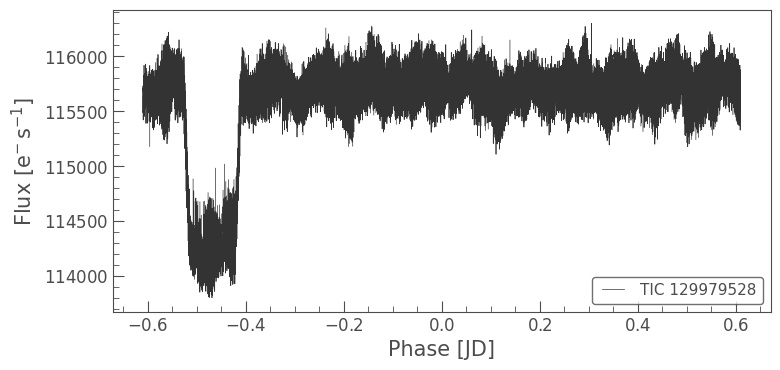

In [35]:
# Fold the light curve at the known planet period
planet_period = 1.21987
lc.fold(period=planet_period).plot();

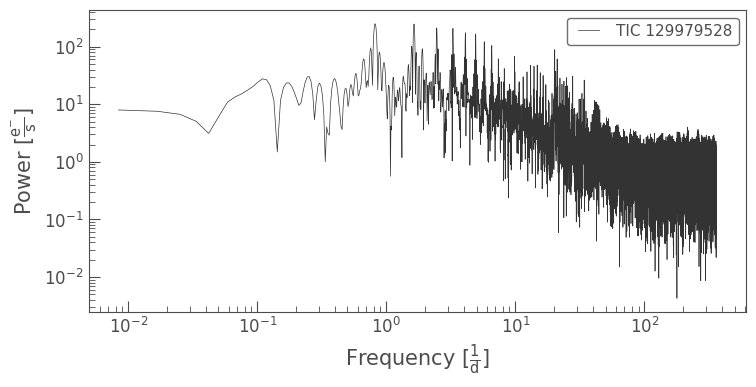

In [36]:
pg = lc.to_periodogram()
pg.plot(scale='log');

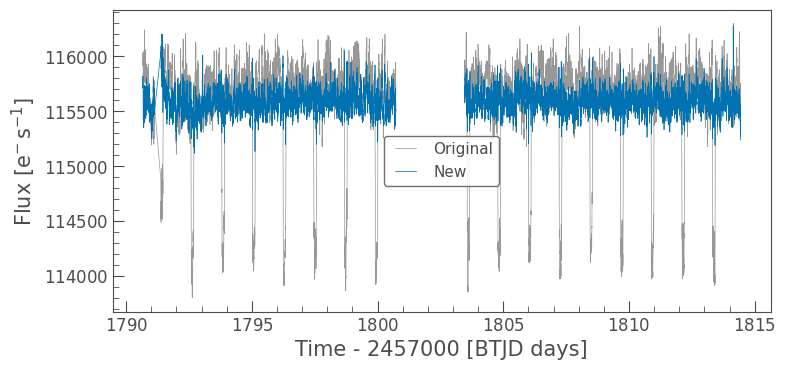

In [37]:
# Remove the signals associated with the 50 highest peaks
newlc = lc.copy()
for i in range(50):
  pg = newlc.to_periodogram()
  model = pg.model(time=newlc.time, frequency=pg.frequency_at_max_power)
  newlc.flux = newlc.flux / model.flux

# Plot the new light curve on top of the original one
ax = lc.plot(alpha=.5, label='Original');
newlc.plot(ax=ax, label='New');

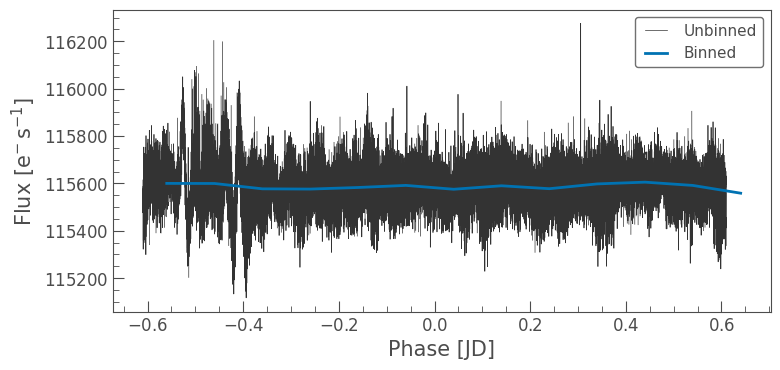

In [38]:
ax = newlc.fold(period=planet_period).plot(label='Unbinned')
newlc.fold(period=planet_period).bin(0.1).plot(ax=ax, lw=2, label='Binned');